<a href="https://colab.research.google.com/github/danishkhanbx/YBI-TaskProject/blob/master/Restaurant%20Sentiment%20Analysis%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis of Restaurant Reviews

**Objective:** Create a Machine Learning Model to Analyze the Sentiments of Restaurant Reviews


**Data Source:** Restaurant_Reviews.tsv

In [15]:
# Import Libraries
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt  # Added for data visualization
import seaborn as sns            # Added for data visualization
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
# Download necessary NLTK resources
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
# Mount Google Drive (if your data file is on Google Drive)
# from google.colab import drive
# drive.mount('/content/drive')

In [18]:
# Import Data from Google Drive (if data is on Google Drive)
# data_path = '/content/drive/My Drive/YourDataFolder/Restaurant_Reviews.tsv'
# data = pd.read_csv(data_path, delimiter='\t')

In [19]:
# Import Data
data = pd.read_csv("Restaurant_Reviews.tsv", delimiter='\t')

In [20]:
# Describe Data
print("Data Overview:")
print(data.head())
print("\nData Statistics:")
print(data.describe())

Data Overview:
                                              Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1

Data Statistics:
            Liked
count  1000.00000
mean      0.50000
std       0.50025
min       0.00000
25%       0.00000
50%       0.50000
75%       1.00000
max       1.00000


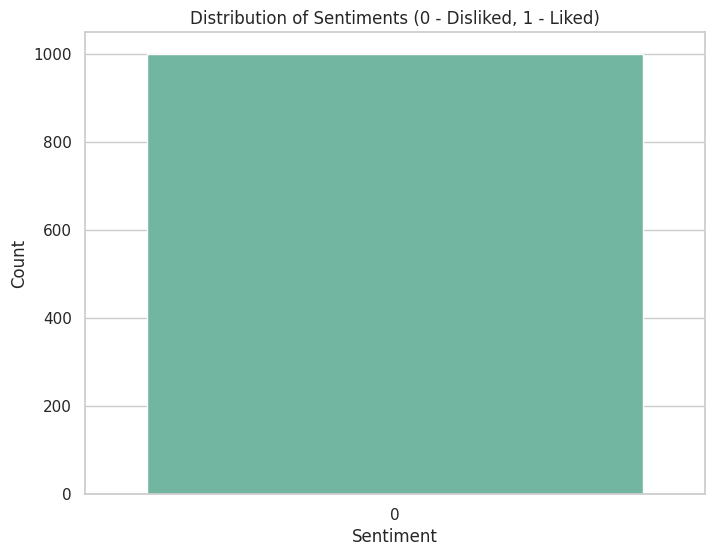

In [21]:
# Data Visualization
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data['Liked'], palette='Set2')
plt.title("Distribution of Sentiments (0 - Disliked, 1 - Liked)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [22]:
# Data Preprocessing
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords and punctuation
    words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]
    return " ".join(words)

data["Review"] = data["Review"].apply(preprocess_text)

In [23]:
# Train-Test Split
X = data["Review"]
y = data["Liked"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Modeling
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

MultinomialNB()

In [26]:
# Model Evaluation
y_pred = model.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification = classification_report(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification)


Model Evaluation:
Accuracy: 0.76
Confusion Matrix:
 [[75 21]
 [27 77]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.78      0.76        96
           1       0.79      0.74      0.76       104

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



In [27]:
# Prediction
def predict_sentiment(review):
    review = preprocess_text(review)
    review_vectorized = vectorizer.transform([review])
    prediction = model.predict(review_vectorized)
    if prediction[0] == 1:
        return "Positive"
    else:
        return "Negative"

In [28]:
# Example prediction 1
sample_review = "The food was excellent and the service was great!"
sentiment = predict_sentiment(sample_review)
print("\nExample Prediction:")
print(f"Review: '{sample_review}'")
print(f"Sentiment: {sentiment}")


Example Prediction:
Review: 'The food was excellent and the service was great!'
Sentiment: Positive


In [29]:
# Example prediction 2
sample_review = "The food was not tasty and the service was the worst"
sentiment = predict_sentiment(sample_review)
print("\nExample Prediction:")
print(f"Review: '{sample_review}'")
print(f"Sentiment: {sentiment}")


Example Prediction:
Review: 'The food was not tasty and the service was the worst'
Sentiment: Negative


# Explanation:
I have created a machine learning model that can analyze the sentiment of restaurant reviews using a CountVectorizer and a Multinomial Naive Bayes classifier.